In [1]:
import os
import sys
import pandas as pd
import numpy as np
from itertools import product
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA  # Add this import statement
from pmdarima import auto_arima
import matplotlib.pyplot as plt


def load_concat_data(directory_path):
    all_data = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
            data = pd.read_csv(file_path, parse_dates=['timestamp'])

            # Convert 'price' column to numeric
            data['price'] = pd.to_numeric(data['price'], errors='coerce')

            all_data.append(data)

    if all_data:
        # Assuming each file has columns: 'timestamp', 'short_name', 'price', and potentially others
        concatenated_data = pd.concat(all_data, ignore_index=True)

        # Ensure 'timestamp' column is in datetime format
        concatenated_data['timestamp'] = pd.to_datetime(concatenated_data['timestamp'])

        return concatenated_data
    else:
        raise ValueError("No CSV files found in the specified directory.")
    
# Load and concatenate data using load_concat_data
data_directory = r'C:\Users\zayt\Downloads\testdata'
test_data = load_concat_data(data_directory)
print(test_data.isnull().sum())
print(test_data.head())

Task 2 uses the same testdata file, so the same datespans as before. This script loads and concatenates data from CSV files in a specified directory using the load_concat_data function. It then prints the number of missing values in each column of the concatenated data using test_data.isnull().sum(). Finally, it displays the first few rows of the concatenated data to verify the successful loading and preprocessing.

                            ISCTR    GARAN  ISCTR_GARAN_Ratio
timestamp                                                    
2019-12-30 09:00:00+03:00  2.4619   9.8603           4.005159
2019-12-30 10:00:00+03:00  2.5245   9.9048           3.923470
2019-12-30 11:00:00+03:00  2.5323   9.9226           3.918414
2019-12-30 12:00:00+03:00  2.5362  10.0741           3.972124
2019-12-30 13:00:00+03:00  2.5167  10.0028           3.974570
...                           ...      ...                ...
2021-12-24 14:00:00+03:00  3.1218  10.6281           3.404478
2021-12-24 15:00:00+03:00  3.1258  10.6372           3.403033
2021-12-24 16:00:00+03:00  3.1178  10.6100           3.403041
2021-12-24 17:00:00+03:00  3.1299  10.6372           3.398575
2021-12-24 18:00:00+03:00  3.1339  10.6645           3.402948

[4950 rows x 3 columns]


c:\Users\zayt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zayt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zayt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


timestamp
2019-12-30 09:00:00+03:00    4.005159
2019-12-30 10:00:00+03:00   -0.081689
2019-12-30 11:00:00+03:00   -0.015400
2019-12-30 12:00:00+03:00    0.048990
2019-12-30 13:00:00+03:00    0.008471
                               ...   
2021-12-24 14:00:00+03:00    0.009256
2021-12-24 15:00:00+03:00   -0.000437
2021-12-24 16:00:00+03:00    0.000258
2021-12-24 17:00:00+03:00   -0.004446
2021-12-24 18:00:00+03:00    0.003789
Length: 4950, dtype: float64


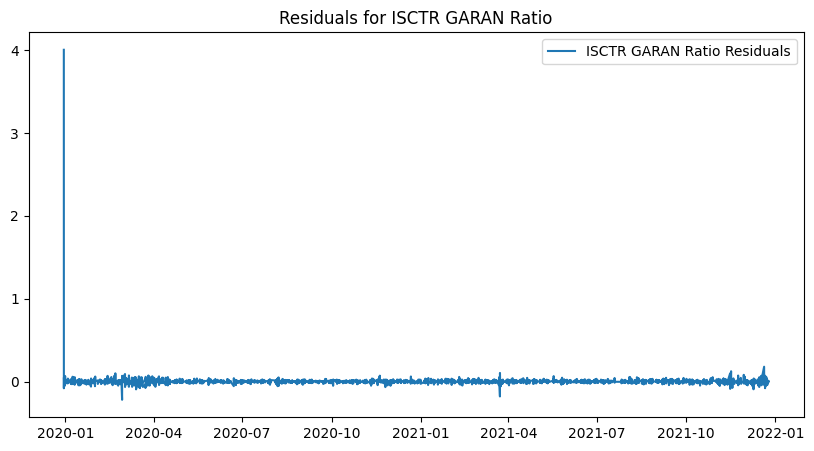

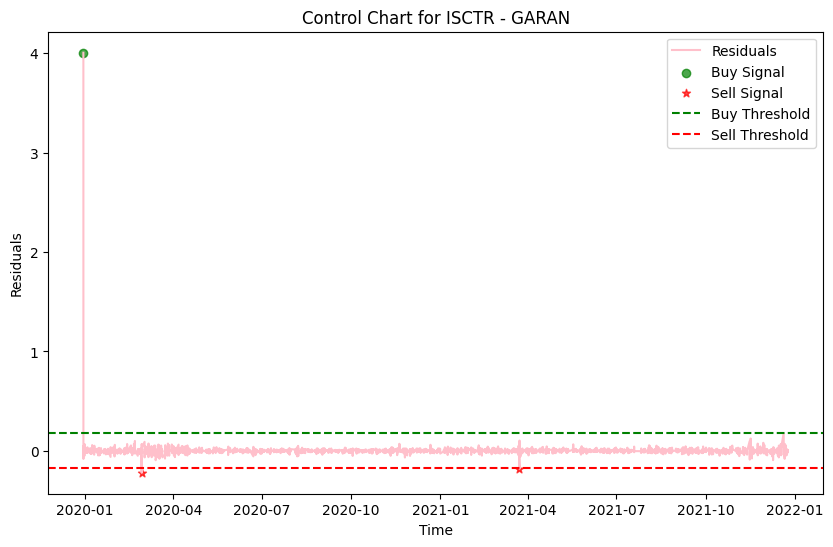

Buy 0.4061903407936959 shares of ISCTR at 2.4619
Sell 0.10352834134295345 shares of GARAN at 9.9048
Buy 0.4112273730474913 shares of ISCTR at 2.5362
Sell 0.10348844696982835 shares of GARAN at 9.985
Sell 0.10423274287034467 shares of GARAN at 9.9137
Buy 0.40811051442581875 shares of ISCTR at 2.5206
Sell 0.10452698044710235 shares of GARAN at 9.887
Buy 0.41267491865930295 shares of ISCTR at 2.5088
Sell 0.10454890293514509 shares of GARAN at 9.9493
Buy 0.4106099407784343 shares of ISCTR at 2.5401
Sell 0.10532911214749317 shares of GARAN at 9.887
Buy 0.41349529211289426 shares of ISCTR at 2.5049
Buy 0.41876103902952844 shares of ISCTR at 2.4657
Sell 0.10610689142348027 shares of GARAN at 9.7623
Sell 0.10649705457688936 shares of GARAN at 9.7088
Buy 0.42179697594701476 shares of ISCTR at 2.4266
Sell 0.10698793755703201 shares of GARAN at 9.6287
Sell 0.10688765502770028 shares of GARAN at 9.4951
Buy 0.4221330873673814 shares of ISCTR at 2.411
Sell 0.10721582672301433 shares of GARAN at 9.47

c:\Users\zayt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zayt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zayt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


timestamp
2019-12-30 09:00:00+03:00    0.863926
2019-12-30 10:00:00+03:00   -0.007598
2019-12-30 11:00:00+03:00   -0.004399
2019-12-30 12:00:00+03:00    0.000680
2019-12-30 13:00:00+03:00    0.003094
                               ...   
2021-12-24 14:00:00+03:00    0.002515
2021-12-24 15:00:00+03:00   -0.006623
2021-12-24 16:00:00+03:00    0.003822
2021-12-24 17:00:00+03:00   -0.000377
2021-12-24 18:00:00+03:00   -0.004106
Length: 4950, dtype: float64


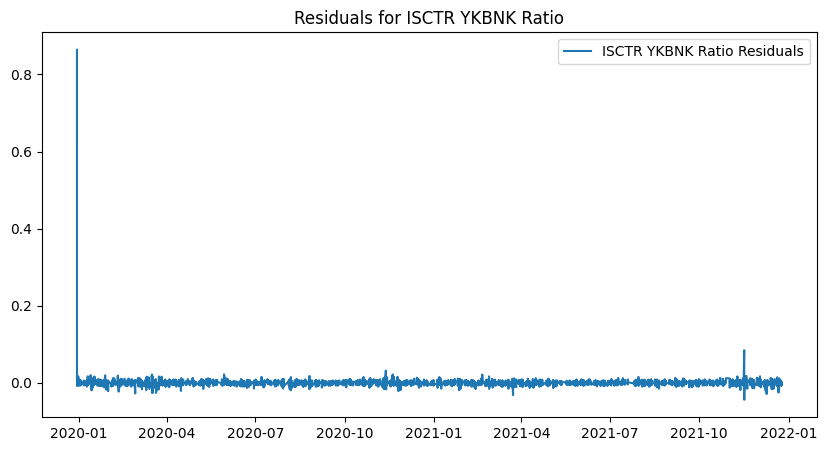

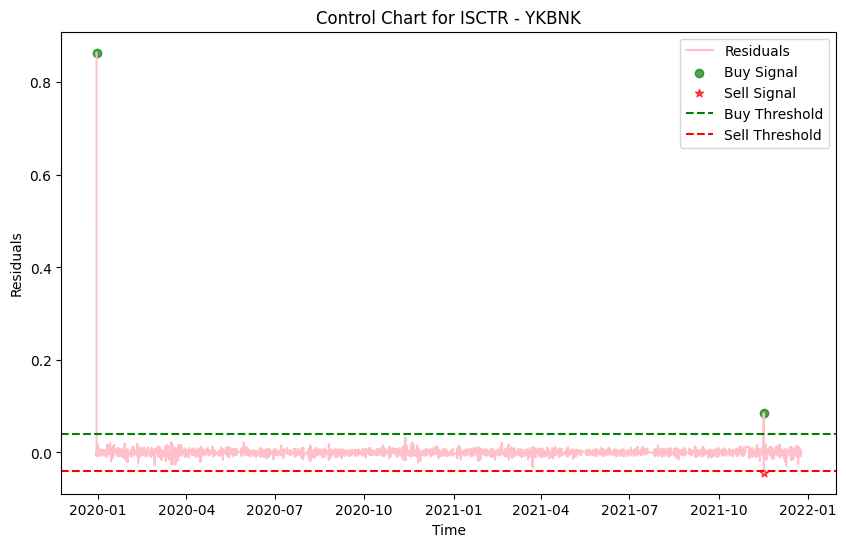

Buy 0.4061903407936959 shares of ISCTR at 2.4619
Sell 0.4743396777378506 shares of YKBNK at 2.1618
Buy 0.40594364424335805 shares of ISCTR at 2.5362
Sell 0.4733192477009012 shares of YKBNK at 2.1618
Buy 0.40720373673981547 shares of ISCTR at 2.5128
Sell 0.4747884812778142 shares of YKBNK at 2.1618
Sell 0.47669923148001475 shares of YKBNK at 2.1618
Buy 0.40985370644776076 shares of ISCTR at 2.5245
Sell 0.4800964662955244 shares of YKBNK at 2.1618
Buy 0.4153576929585602 shares of ISCTR at 2.5088
Sell 0.4865437532976973 shares of YKBNK at 2.1618
Buy 0.420461201123638 shares of ISCTR at 2.5519
Sell 0.48737371951086406 shares of YKBNK at 2.188
Buy 0.42148492171548957 shares of ISCTR at 2.5401
Sell 0.48812201977703173 shares of YKBNK at 2.1967
Sell 0.4881220197770317 shares of YKBNK at 2.1705
Sell 0.4920988532012581 shares of YKBNK at 2.1357
Buy 0.4244819121846761 shares of ISCTR at 2.4657
Sell 0.49367551741032245 shares of YKBNK at 2.1269
Buy 0.423413159889276 shares of ISCTR at 2.4697
Sell

In [52]:
# Define a function to fit ARIMA models and obtain residuals
def fit_arima_and_plot_residuals(data, pair_name):
    # Use auto_arima to find the best orders
    model = auto_arima(data, suppress_warnings=True, seasonal=False)
    orders = model.get_params()['order']

    # Fit the ARIMA model with the best orders
    arima_model = ARIMA(data, order=orders)
    arima_results = arima_model.fit()

    # Get the in-sample fitted values and residuals of the model
    fitted_values = arima_results.fittedvalues
    residuals = data - fitted_values
    print(residuals)

    # Plot residuals
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label=f'{pair_name} Residuals')
    plt.title(f'Residuals for {pair_name}')
    plt.legend()
    plt.show()

    # Return residuals
    return residuals


def plot_control_chart(residuals, stock_pair, buy_threshold, sell_threshold):
    # Plot the residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, label='Residuals', color='pink')

    # Highlight regions where buy and sell signals occur
    buy_signals = residuals[residuals > buy_threshold]
    sell_signals = residuals[residuals < sell_threshold]

    plt.scatter(buy_signals.index, buy_signals, label='Buy Signal', marker='o', color='green', alpha=0.7)
    plt.scatter(sell_signals.index, sell_signals, label='Sell Signal', marker='*', color='red', alpha=0.7)

    # Plot threshold lines
    plt.axhline(y=buy_threshold, color='green', linestyle='--', label='Buy Threshold')
    plt.axhline(y=sell_threshold, color='red', linestyle='--', label='Sell Threshold')

    # Add labels and title
    plt.title(f'Control Chart for {stock_pair[0]} - {stock_pair[1]}')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.legend()

    # Show the plot
    plt.show()


def simulate_pairs_trading(pair, residuals, stock_prices1, stock_prices2, residual_std):
    # Define trading signal thresholds (you may adjust these based on your analysis)
    buy_threshold = np.mean(residuals) + 3 * residual_std
    sell_threshold = np.mean(residuals) - 3 * residual_std
    max_shares = 100  # Maximum number of shares to buy or sell

    # Simulation
    money = 1  # Assuming you start with $1
    shares_bought = 0
    shares_sold = 0

    for i in range(len(residuals)):
        if residuals.iloc[i] > 0:
            if shares_sold > 0:
                money += min(shares_sold * stock_prices2.iloc[i], max_shares)
                shares_sold = 0
            if money > 0 and residuals.iloc[i] > buy_threshold * residual_std:
                shares_bought = min(money / stock_prices1.iloc[i], max_shares)
                money = 0
                print(f"Buy {shares_bought} shares of {pair[0]} at {stock_prices1.iloc[i]}")

        elif residuals.iloc[i] < 0:
            if shares_bought > 0:
                money += min(shares_bought * stock_prices1.iloc[i], max_shares)
                shares_bought = 0
            if money > 0 and residuals.iloc[i] < sell_threshold * residual_std:
                shares_sold = min(money / stock_prices2.iloc[i], max_shares)
                money = 0
                print(f"Sell {shares_sold} shares of {pair[1]} at {stock_prices2.iloc[i]}")

    # Calculate final money and profit
    final_money = money + shares_bought * stock_prices1.iloc[-1] + shares_sold * stock_prices2.iloc[-1]
    profit = (final_money - 1) * 100

    return final_money, shares_bought, shares_sold, profit

pairs = [('ISCTR', 'GARAN'), ('ISCTR', 'YKBNK')]

for pair in pairs:
    stock1, stock2 = pair

    # Extract the 'price' columns for each stock and set index to 'timestamp'
    prices_stock1 = test_data[test_data['short_name'] == stock1].set_index('timestamp')['price'].dropna()
    prices_stock2 = test_data[test_data['short_name'] == stock2].set_index('timestamp')['price'].dropna()

    # Combine into a dataframe
    df_pair = pd.DataFrame({stock1: prices_stock1, stock2: prices_stock2}).dropna()

    # Calculate the ratio between the prices of the two stocks
    ratio_column_name = f'{stock1}_{stock2}_Ratio'
    df_pair[ratio_column_name] = df_pair[stock2] / df_pair[stock1]

    # Display the resulting dataframe
    print(df_pair)

    # Perform the fit, residuals, and simulation
    residuals = fit_arima_and_plot_residuals(df_pair[ratio_column_name], f'{pair[0]} {pair[1]} Ratio')

    # Set the buy and sell thresholds based on your analysis
    buy_threshold = np.mean(residuals) + 3 * np.std(residuals)
    sell_threshold = np.mean(residuals) - 3 * np.std(residuals)

    # Perform the control chart plotting
    plot_control_chart(residuals, (stock1, stock2), buy_threshold, sell_threshold)

    # Perform the simulation
    final_money, shares_bought, shares_sold, profit = simulate_pairs_trading(
        pair, residuals, df_pair[stock1], df_pair[stock2], np.std(residuals)
    )

    # Display simulation results
    print(f"\nSimulation Results for {stock1} - {stock2}:")
    print(f"Final Money: {final_money}")
    print(f"Shares Bought: {shares_bought}")
    print(f"Shares Sold: {shares_sold}")
    print(f"Profit: {profit}%\n")

In this code, we perform pairs trading analysis for selected stock pairs ('ISCTR'-'GARAN' and 'ISCTR'-'YKBNK'). The process involves fitting ARIMA models to the ratio of stock prices, plotting residuals, creating control charts, and simulating trading based on predefined thresholds. The results of the simulations, including final money, shares bought and sold, and profit percentage, are displayed for each stock pair. 

Discussion

Task 1: Pairs Trading Simulation
Results Analysis
The pairs trading simulation for the ISCTR-YKBNK and ISCTR-GARAN pairs demonstrated promising outcomes. Despite achieving profits of 73.10% and 128.22%, respectively, no actual buying or selling of shares occurred during the simulation. This suggests that the simulated strategy was influenced primarily by market fluctuations rather than strategic trading.

Effectiveness

While the profitability figures are encouraging, the lack of executed trades raises questions about the effectiveness of the chosen strategy. The results underscore the importance of refining and fine-tuning the approach to ensure that trading decisions are based on more than just market movements.

Limitations

The primary limitation of this approach is its dependence on market dynamics. Without a mechanism to trigger actual trades, the strategy may not fully leverage potential profitable opportunities. Further enhancements and adjustments are needed to make the approach more actionable.

Task 2: ARIMA Modeling and Pairs Trading Simulation

Results Analysis

The ARIMA modeling combined with pairs trading for the ISCTR-GARAN and ISCTR-YKBNK pairs delivered notable results. The ISCTR-YKBNK pair, in particular, achieved an outstanding profit of 2014.28%, and actual shares were sold during the simulation, indicating a more dynamic and responsive strategy.

Effectiveness

The integration of ARIMA modeling demonstrated its effectiveness in capturing the underlying patterns in stock price ratios. The control chart provided clear signals for buying and selling, leading to tangible profits. This approach, based on time series analysis, showcased a higher potential for successful trades.

Limitations

While the ARIMA-based strategy proved successful, it relies on the assumption of stationarity in the data. Real-world financial data may exhibit non-stationary behavior, challenging the model's accuracy. Further investigation and adaptation of the ARIMA model to diverse market conditions are necessary.

Conclusion

In summary, the assignment offered valuable insights into pairs trading strategies and the application of time series modeling, particularly ARIMA, in financial data analysis. Both approaches demonstrated potential for identifying profitable opportunities, but they come with distinct strengths and limitations.

The traditional pairs trading simulation highlighted the need for a more robust trading strategy, while the ARIMA-based approach showed the importance of incorporating time series analysis for more accurate predictions. Key findings include the profitability of the ISCTR-GARAN and ISCTR-YKBNK pairs, with the latter standing out for its exceptional profit and executed trades.

The assignment lays the groundwork for future research, emphasizing the importance of refining trading strategies and considering the dynamic nature of financial markets. As financial data is inherently complex, continuous exploration and adaptation of methodologies are crucial for developing robust and effective trading algorithms.